In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import zipfile,os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-06-25 05:44:35--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M   148MB/s    in 2.1s    

2020-06-25 05:44:38 (148 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
pip install split_folders

In [5]:
import split_folders
split_folders.ratio('/tmp/rockpaperscissors/rps-cv-images', output='/tmp/rockpaperscissors/data', seed=1337, ratio=(.8,.2))

base_dir = '/tmp/rockpaperscissors/data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

Copying files: 2188 files [00:00, 3264.59 files/s]


In [6]:
os.listdir('/tmp/rockpaperscissors/data/train')

['paper', 'scissors', 'rock']

In [7]:
os.listdir('/tmp/rockpaperscissors/data/val')

['paper', 'scissors', 'rock']

In [8]:
training_datagen = ImageDataGenerator(rescale=1./255,
                        height_shift_range=0.2,
                        horizontal_flip=True,
                        vertical_flip=True)

validation_datagen = ImageDataGenerator(validation_split=0.2,
                        rescale=1./255)

augs_datagen = ImageDataGenerator(rescale=1./255,
                        horizontal_flip=True,
                        height_shift_range=.2,
                        vertical_flip = True,
                        validation_split = 0.2)

In [9]:
train_generator = training_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)
 
validation_generator = augs_datagen.flow_from_directory(
        validation_dir, 
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [10]:
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=10,
    verbose=1,
    mode='min'
)

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max',
    save_weights_only=False
)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(train_generator,
          steps_per_epoch=55,
          epochs=25,
          validation_data=validation_generator,
          #validation_steps=5,
          verbose=1,
          callbacks = [earlystop, checkpoint])

saved_model = load_model('best_model.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

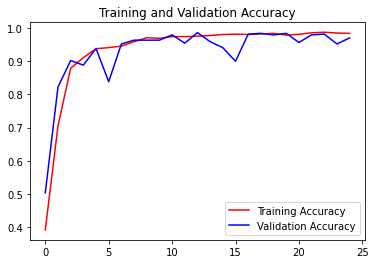

<Figure size 432x288 with 0 Axes>

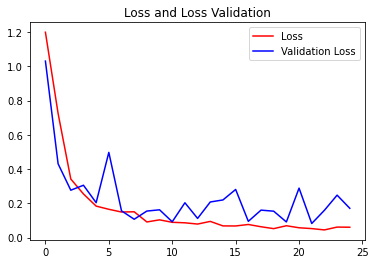

<Figure size 432x288 with 0 Axes>

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'r', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()



plt.plot(epochs_range, loss, 'r', label='Loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation Loss')
plt.title('Loss and Loss Validation')
plt.legend(loc=0)
plt.figure()
plt.show()

Saving hand.jpg to hand (1).jpg
hand.jpg
paper


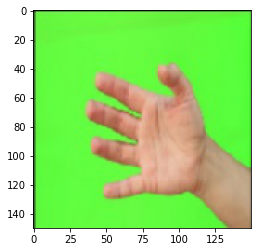

In [13]:
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  
  print(fn)
  if classes[0][0] == 1:
    print('paper')
  elif classes[0][1] == 1:
    print('rock')
  elif classes[0][2] == 1:
    print('scissors')